In [1]:
import firebase_admin
from firebase_admin import credentials, firestore
import re
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cred = credentials.Certificate("serviceAccountKey.json")
firebase_admin.initialize_app(cred)
db = firestore.client()

In [14]:
def plot_doc(doc_ref):
    doc = doc_ref.get()
    a = doc.to_dict()
    # print(a)
    keys = list(sorted(a.keys()))
    diffs = [] 
    for i in range(0,len(keys)-1):
        key1 = keys[i]
        key2 = keys[i+1]
        keyparsed1 = datetime.strptime(key1, "%a %b %d %H:%M:%S %Y")
        keyparsed2 = datetime.strptime(key2, "%a %b %d %H:%M:%S %Y")
        dif = keyparsed2-keyparsed1
        #print(dif)
        #k = dif.split(':')
        #measure = k[0]*3600+k[1]*60+k[2]
        measure = dif.total_seconds()
        diffs.append(measure)
    print("Average : {}".format(np.mean(diffs)))
    print("Std dev : {}".format(np.std(diffs)))
    plt.hist(diffs, normed=True, bins=100,cumulative=True)
    plt.ylabel('Probability');

Average : 1.1948051948051948
Std dev : 0.42758643202998253


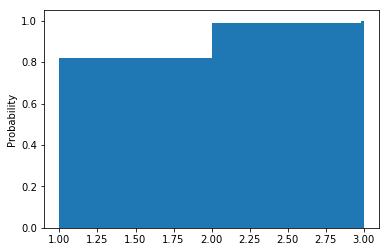

In [15]:
# database_ref = db.collection(u'sensor_data_mp')
arduino_file_ref = db.collection(u'sensor_data_mp').document(u'arduino')
# docs = database_ref.get()
# for doc in docs:
#     plot_doc(doc)
plot_doc(arduino_file_ref)

In [33]:
key1 = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
keyparsed1 = datetime.strptime(key1, "%Y-%m-%d %H:%M:%S.%f")
keyparsed1

datetime.datetime(2018, 10, 31, 18, 19, 13, 510000)

In [34]:
key2 = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
keyparsed2 = datetime.strptime(key2, "%Y-%m-%d %H:%M:%S.%f")
keyparsed2

datetime.datetime(2018, 10, 31, 18, 19, 15, 124000)

In [35]:
diff = (keyparsed2-keyparsed1).total_seconds()+(keyparsed2-keyparsed1).microseconds/1000000.0
diff

2.228

In [ ]:
def time_diff(timestr1,timestr2):
    keyparsed1 = datetime.strptime(timestr1, "%Y-%m-%d %H:%M:%S.%f")
    keyparsed1 = datetime.strptime(timestr2, "%Y-%m-%d %H:%M:%S.%f")
    diff = (keyparsed2-keyparsed1).total_seconds()+(keyparsed2-keyparsed1).microseconds/1000000.0
    return diff    